# Step 1: Blob detection

The `lentil.png` image is a greyscale image from constructed from the red light and near infrared light channels of a multispectral camera.  (Thanks to Dr. Kirstin Bett, Dept. of Plant Sciences, College of Agriculture for the image!).  The bright blobs you see in the middle section of the image are clusters of lentil plants called plots (each plot is a different genetic lineage).  These are areas of interest for plant breeders because they want to analyze the patches of plant, while ignoring the background soil.  To do that in an automated algorithm, we first have to find the plots!

Use one of the blob detection functions described at the end of the Topic 5 lecture slides to detect the blobs in the `lentil.png` image.  Obtain the best result you can from any one of the three available functions (in `skimage.feature`), namely `blob_log()`, `blob_dog()`, or `blob_doh()`.  Try the different functions and experiment with their parameters.   Don't worry too much about the correctness of the blobs at the very top and very bottom that are outside the area of the field trial.  These are not areas of interest.

For your best result, draw the blobs as circles on the output image and display the result.    The last slide of Topic 5 gives you an example of some code that does this.  Sample output is shown in the assignment description document.

Sample output is given in the assignment document but be aware that it is not necessarily representative of the quality of the blob detection that you might achieve because I did not spend more than 5 minutes tweaking the parameters.  You should be able to do at least as well, but possibly also better.  

_Hint: as usual, it is suggested that you convert the image to dtype `float` before processing._

_Hint: the lentil field image is pretty big, so you'll need to set the figure size to something larger.  For me `plt.figure(figsize=(20,7))` worked well, but I have an almost 4K display.  Smaller may work for you._




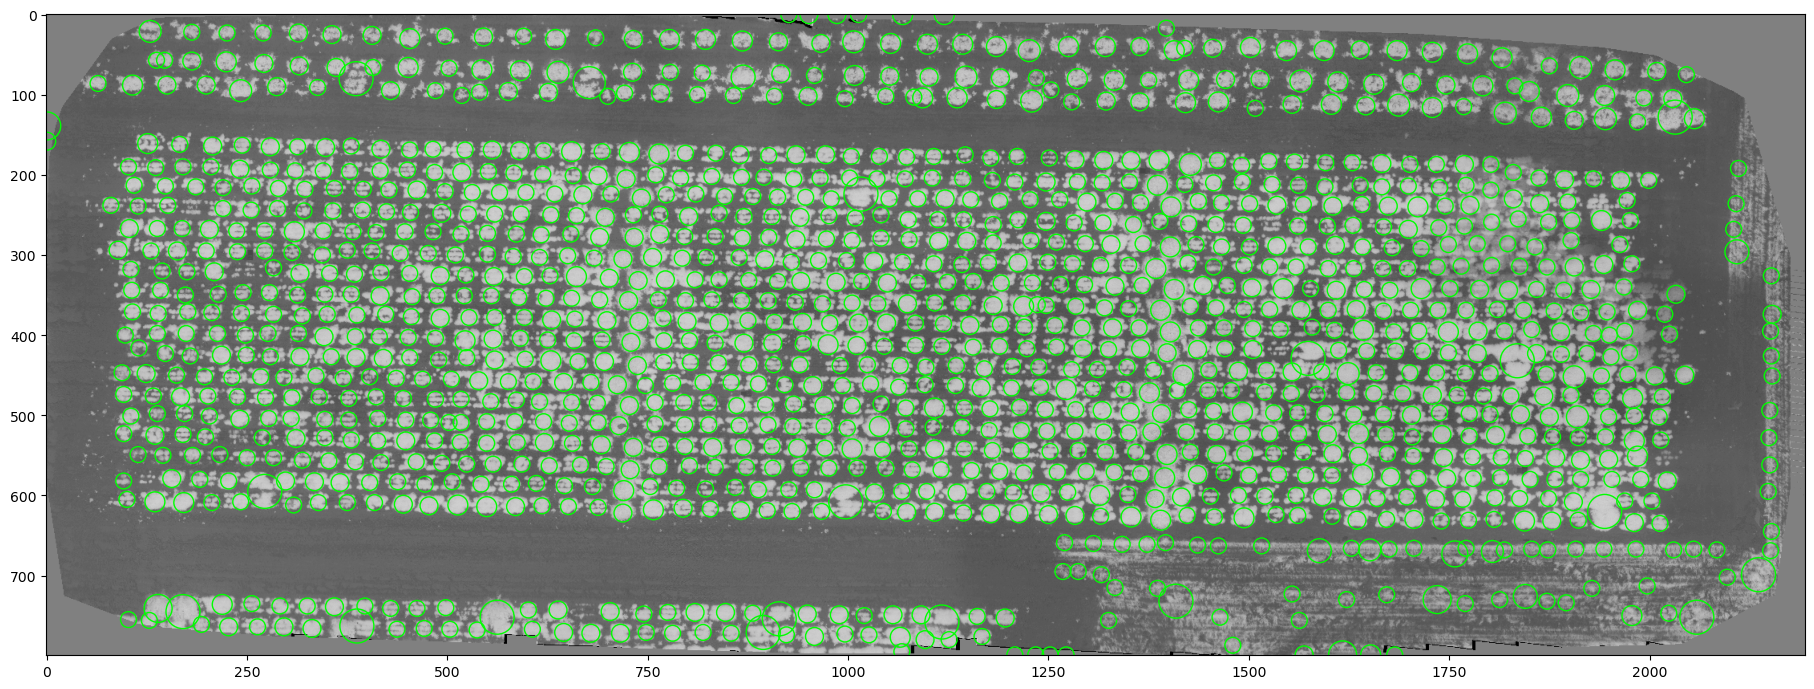

In [38]:
import skimage.io as io
import skimage.util as util
import skimage.feature as feat
import matplotlib.pyplot as plt
import math as m

# Write your code here.  It shouldn't take much.  Adapt the example on the last slide of the Topic 5 lecture notes.
# Load the image
image = io.imread('lentil.png')
image_float = util.img_as_float(image)  # Convert the image to float type

# Detect the blobs using the blob_log method
blobs_log = feat.blob_log(image_float, max_sigma=15, min_sigma=7, threshold=.06)

# Compute radii in the third column
blobs_log[:, 2] = blobs_log[:, 2] * m.sqrt(2)

# Plot the image with the detected blobs
plt.figure(figsize=(20,7))
plt.imshow(image, cmap='gray')

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', fill=False)
    plt.gca().add_patch(c)

plt.tight_layout()
plt.show()

# Step 2:  Thinking and Analysis

### Answer these questions, right here in this block.

1.  What properties of the image did you consider when selecting parameters for blob detection?  

	_Your answer:_
    
    When selecting parameters for blob detection, I considered the following properties:
    
       + Size of Blobs: The default parameters of the `blob_log` function weren't suitable for precisely detecting the plots, as the range of default size is too big. 
    
            - Regarding defaut `min_sigma`, led to the detection of very small fragments resembling tiny circles. In several plots, it appeared that a main circle surrounded by several tiny circles, which cluttered the result image. To address this, I increased `min_sigma` to 7 to filter out these small circles.
            <br>
            
            - Regarding defaut `max_sigma`, the function sometimes detected blobs that encompassed multiple plots. To address this, I reduced `max_sigma` to 15, aligning it with the size of the plots.
       <br>
       
       + Intensity: The default `threshold` setting proved insufficient for detecting all the plots accurately. I found that reducing the `threshold` value was necessary to enhance the detection of areas with lower intensities. However, it was essential to keep this value not too low to prevent including the grey area as part of the blobs.
       <br>
       
       + The blob promixity: the plots were quite close to each other, so fine-tuning both the `sigma` and `threshold` parameters was necessary to guarantee the separate detection of individual blobs and to prevent the merging of adjacent blobs.
       <br>
       
       + After fine-tuning, I found that `max_sigma` = 15, `min_sigma` = 7 and `threshold` = 0.06 gave an approriate result image that detected plots mostly separatedly with just few overlap/merging circles, and did not include grey areas.
       <br>
       
2.  What kinds of errors (in terms of detecting the plots) did you observe in the detected blobs?  

	_Your answer:_
    
    In terms of detecting the plots, the following errors were observed:
    
    + Merging Blobs: In areas where plots are closely packed, the detected blobs were sometimes merged, indicating that two or more plots might be detected as a single plot.
    <br>
    
    + Overlapping Blobs: Some circles overlapped theirs neighbors. 
    <br>
    
    + Missed Blobs: Some smaller plots, plots with noises or plots with significant low intensity were not be detected as they didn't meet the threshold and size.
    <br>

3.  How might you mitigate those errors in one or more post-processing steps?

	_Your answer:_
    
    To mitigate the errors, the following post-processing steps can be considered:
    
    + Applying morphological operations (erosion followed by dilation (opening operation)) can help in separating blobs that packed close plots or overlapping blobs.
    <br>
    
    + Using a connected component analysis, we can identify regions that were detected as single blobs but actually consist of multiple plots, or regions that overlapped. Such regions can be further segmented to separate individual plots.
    <br>
    
    + Apply boundary tracing to obtain boundaries of the plots packed in merging/ ovelapping blobs, and then segment to separate individual plots.
    <br>
    
    + To address the missed blobs caused by too small plots, applying dilation followed by erosion (closing) can help in detecting new blobs.
    <br>
    
    + For missed blobs caused by noise, filters like Gaussian blur to smoothen the image, or a median filter to reduce noise can be considered to be used.
    <br>
    
    + To identify blobs with low intensity, we can use histogram equalization to improve the contrast of the image, making faint blobs more distinct.